In [384]:
#Import all relevant libraries
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from ydata_profiling import ProfileReport
import sweetviz as sv
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [385]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [386]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [387]:
df.shape

(10754, 22)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [389]:
#ProfileReport(df, title="Profiling Report")

In [390]:
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [391]:
#Display number missing values per column
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

### Data Cleaning - Outliers

In [392]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [393]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [394]:
#made a new goalkeeper df
df_goalkeeper = df[df['position'] == 'Goalkeeper']

In [395]:
df.drop('player', axis=1, inplace=True)
df.drop('goals conceded', axis=1, inplace=True)
df.drop('clean sheets', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

# Drop rows where position is 'Goalkeeper'
df = df[df['position'] != 'Goalkeeper']


In [396]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [397]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [398]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding

categorical_features = ['team', 'position']
numeric_features = [
 'height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'minutes played',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'position_encoded',
 'winger']

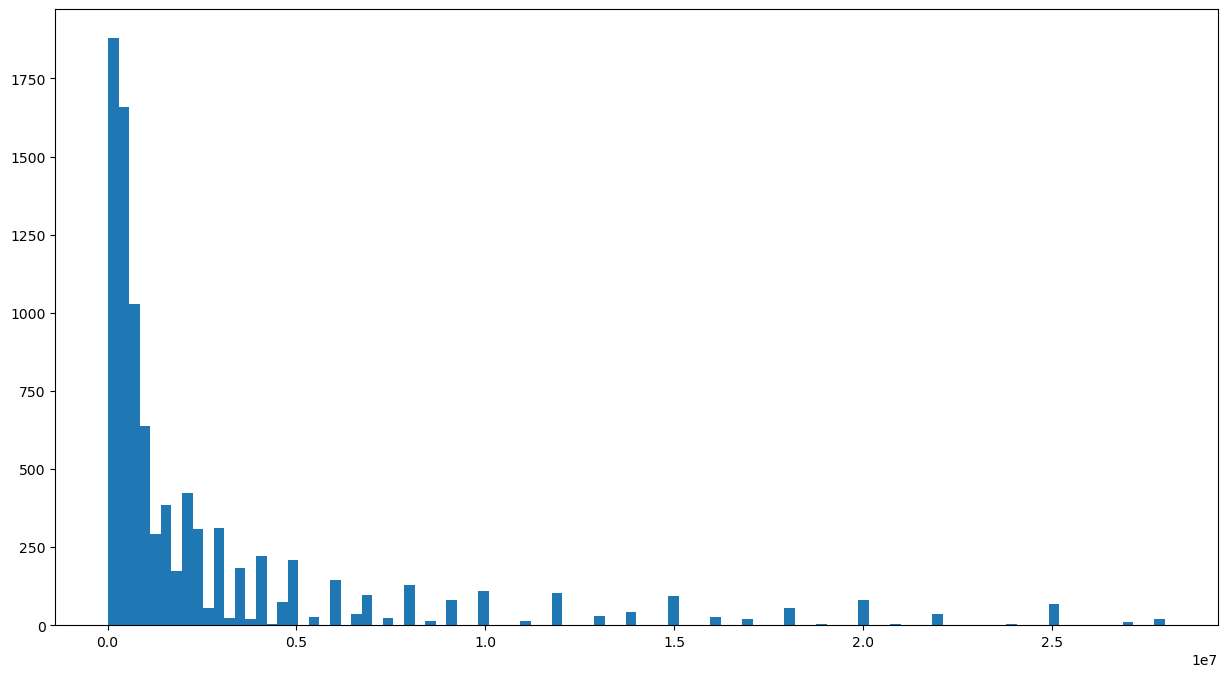

In [399]:
df = df[df['current_value']>2000]
df = df[df['current_value']<=28000000]
plt.figure(figsize=(15,8))

plt.hist(df['current_value'], bins=100);

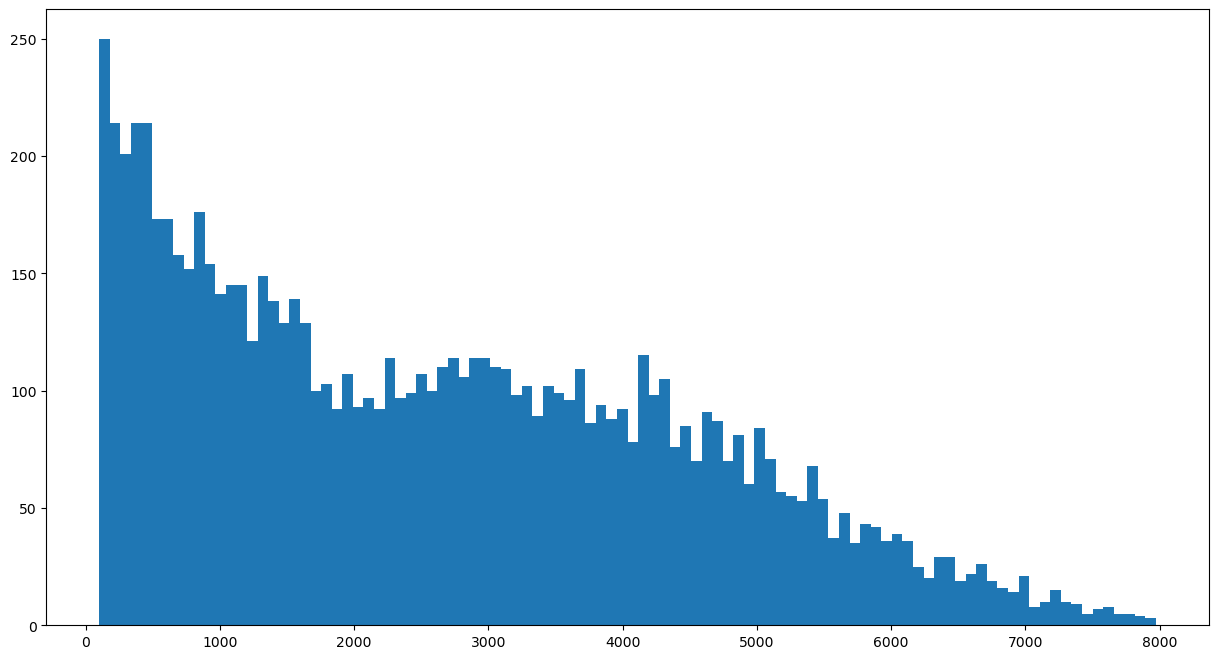

In [400]:
df = df[df['minutes played']>=100]
df = df[df['minutes played']<=8000]
plt.figure(figsize=(15,8))

plt.hist(df['minutes played'], bins=100);

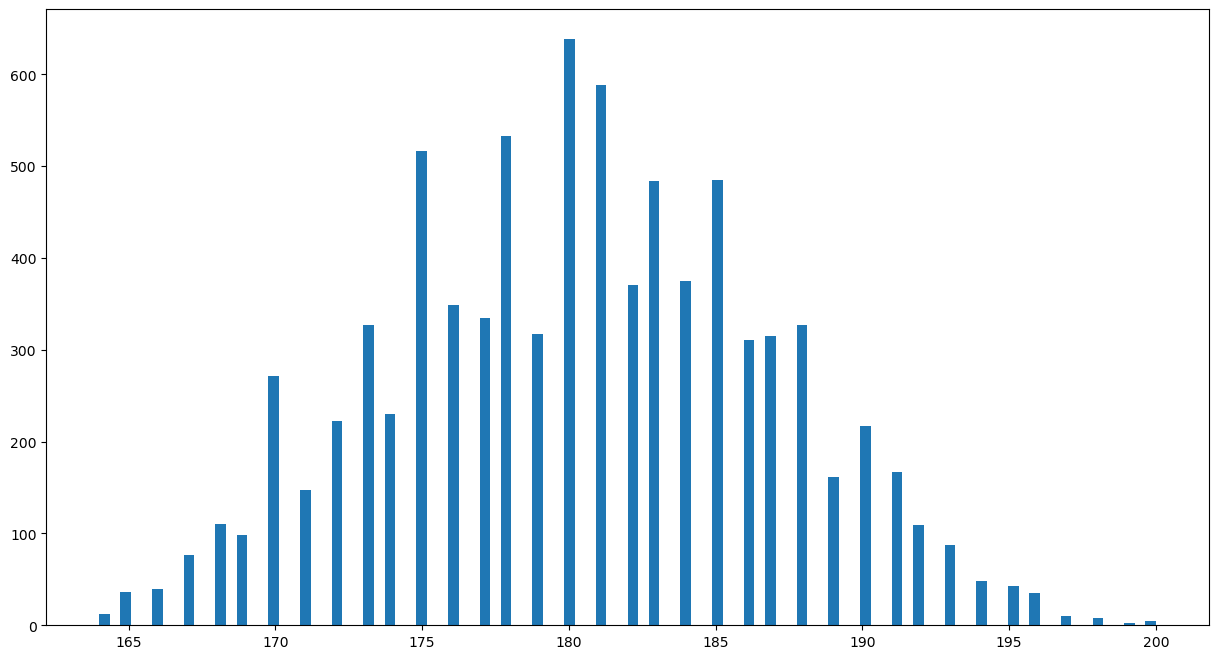

In [401]:
df = df[df['height']>=164]
df = df[df['height']<=200]
plt.figure(figsize=(15,8))

plt.hist(df['height'], bins=100);

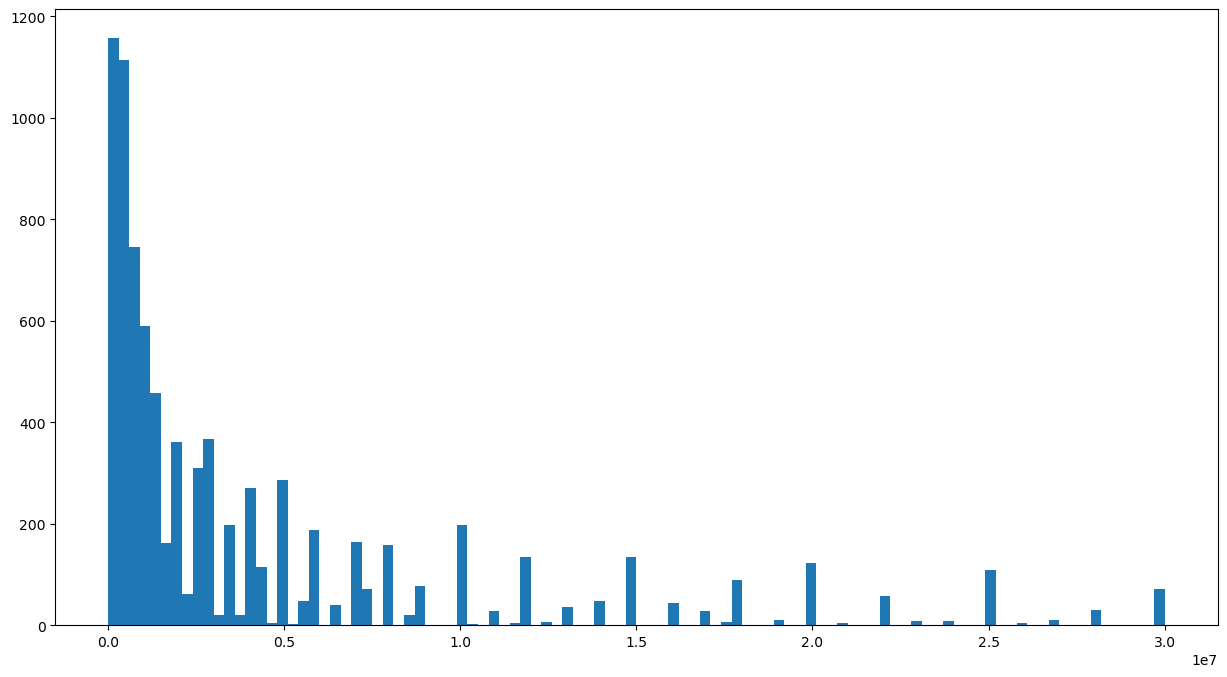

In [402]:
df = df[df['highest_value']>2000]
df = df[df['highest_value']<=30000000]
plt.figure(figsize=(15,8))

plt.hist(df['highest_value'], bins=100);

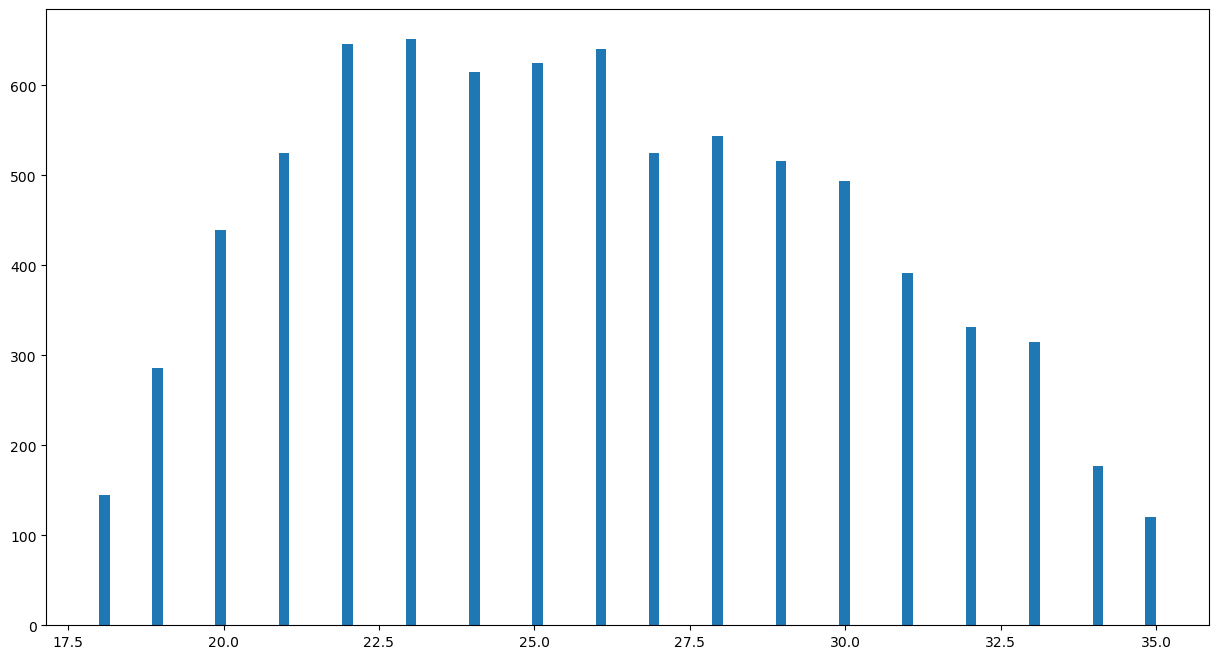

In [403]:
df = df[df['age']>=18]
df = df[df['age']<=35]
plt.figure(figsize=(15,8))

plt.hist(df['age'], bins=100);

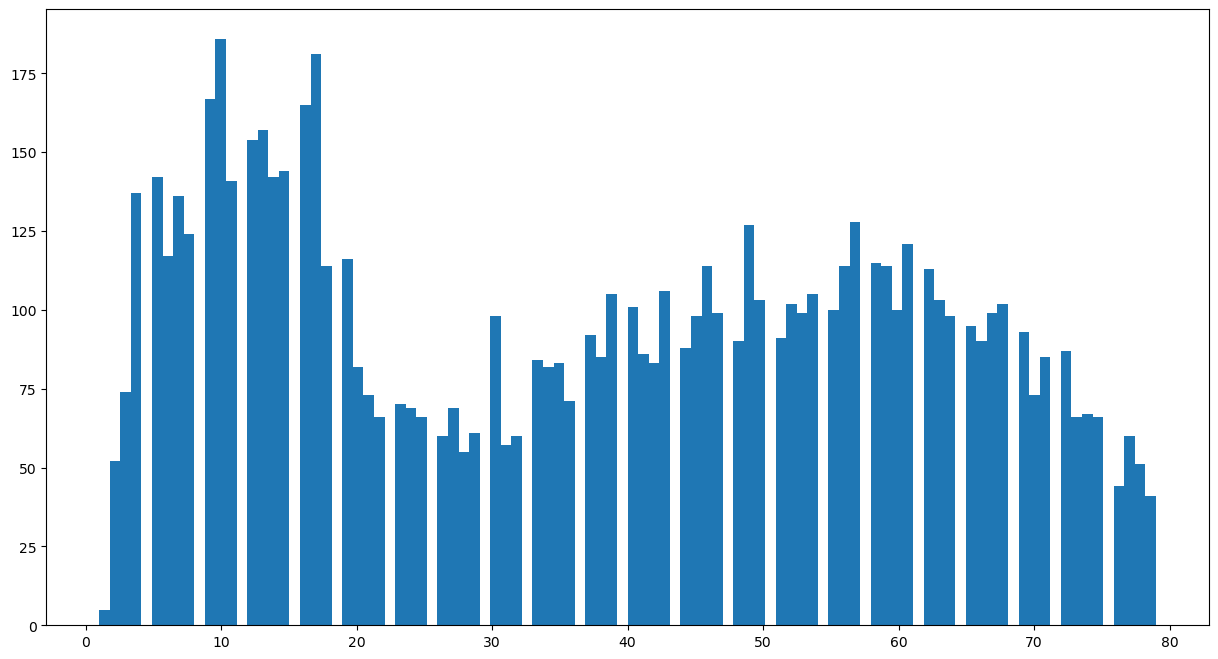

In [404]:
df= df[df['appearance']>0]
df= df[df['appearance']<80]

plt.figure(figsize=(15,8))

plt.hist(df['appearance'], bins=100);

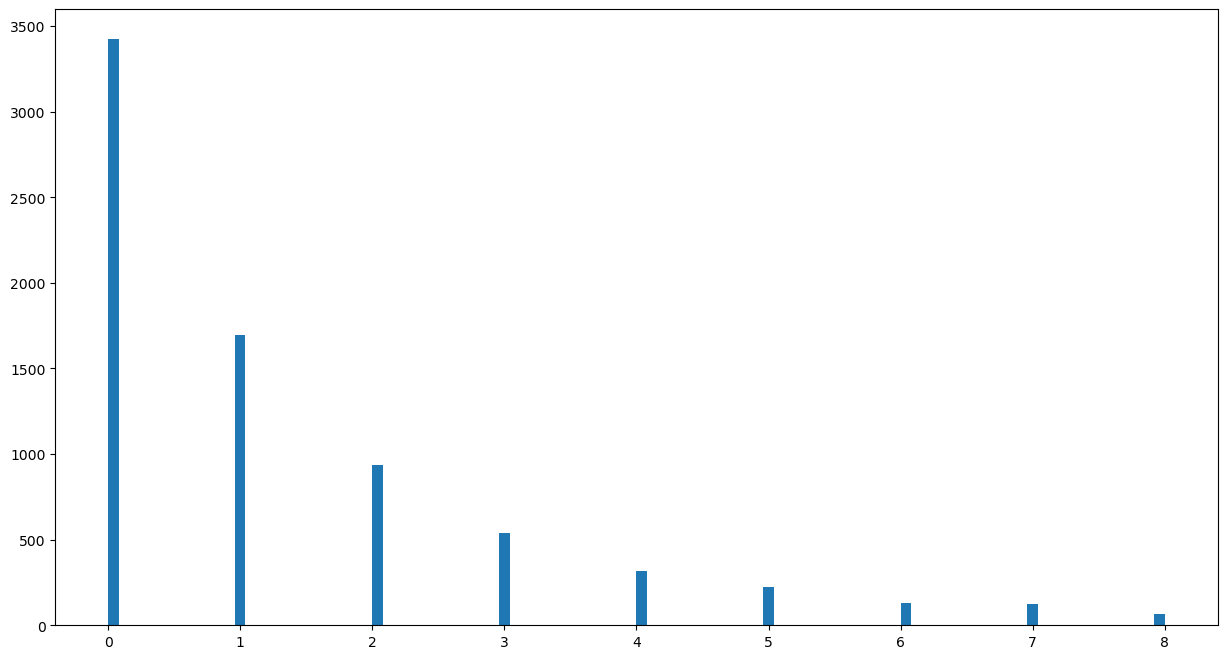

In [405]:
df = df[df['award']<=8]
plt.figure(figsize=(15,8))

plt.hist(df['award'], bins=100);

In [406]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded', 'winger'],
      dtype='object')

In [407]:
df.shape

(7460, 18)

In [408]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [350]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [351]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,...,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
7,185.0,31.0,8,0.0,0.0,0.216346,0.0,0.0,416,932,...,False,True,False,False,False,False,False,False,False,False
8,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,2758,47,...,False,True,False,False,False,False,False,False,False,False


In [352]:
df.shape

(7460, 405)

### correlation

In [353]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.808147
appearance                   0.366119
minutes played               0.361053
award                        0.177270
                               ...   
team_Daegu FC               -0.036656
team_Marumo Gallants FC     -0.037914
team_Gangwon FC             -0.038278
team_Daejeon Hana Citizen   -0.038460
age                         -0.107896
Name: current_value, Length: 405, dtype: float64


In [354]:
# Set the correlation threshold
threshold = 0.09

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'team_AS Monaco', 'team_Arsenal FC',
       'team_Brentford FC', 'team_Brighton &amp; Hove Albion',
       'team_Chelsea FC', 'team_Everton FC', 'team_Leeds United',
       'team_Leicester City', 'team_Olympique Lyon', 'team_Red Bull Salzburg',
       'team_Southampton FC', 'team_Stade Rennais FC', 'team_VfL Wolfsburg',
       'team_Wolverhampton Wanderers'],
      dtype='object')

In [355]:
selected_features = ['age', 'appearance', 'goals', 'assists', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'team_AS Monaco', 'team_Arsenal FC',
       'team_Atalanta BC', 'team_Brentford FC',
       'team_Brighton &amp; Hove Albion', 'team_Chelsea FC',
       'team_Crystal Palace', 'team_Everton FC', 'team_Leeds United',
       'team_Leicester City', 'team_Olympique Lyon', 'team_Southampton FC',
       'team_Stade Rennais FC', 'team_Wolverhampton Wanderers']


In [356]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'minutes played', 'days_injured',
       ...
       'position_Defender', 'position_Defender Centre-Back',
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_midfield', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'position_midfield-LeftMidfield',
       'position_midfield-RightMidfield'],
      dtype='object', length=405)

In [357]:
df = df[selected_features]
df.head()

,age,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,...,team_Brighton &amp; Hove Albion,team_Chelsea FC,team_Crystal Palace,team_Everton FC,team_Leeds United,team_Leicester City,team_Olympique Lyon,team_Southampton FC,team_Stade Rennais FC,team_Wolverhampton Wanderers
7,31.0,8,0.000000,0.000000,416,932,169,7,2000000,20000000,...,False,False,False,False,False,False,False,False,False,False
8,21.0,34,0.000000,0.000000,2758,47,13,0,2000000,2000000,...,False,False,False,False,False,False,False,False,False,False
11,22.0,34,0.000000,0.033507,2686,175,28,1,10000000,12000000,...,False,False,False,False,False,False,False,False,False,False
20,20.0,39,0.129125,0.064562,2788,0,0,1,800000,800000,...,False,False,False,False,False,False,False,False,False,False
21,18.0,51,0.153759,0.102506,3512,0,0,1,800000,800000,...,False,False,False,False,False,False,False,False,False,False


In [358]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [359]:
X.shape

(7460, 23)

### Buliding the Model

In [360]:
model = LinearRegression()

In [361]:
ridge_model = Ridge()

In [362]:
lasso_model = Lasso()

In [363]:
param_grid = {
    'alpha': [0.1, 1, 10, 50, 100,1000]
}


grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error', 
                           verbose=1)


grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

### Train the Model

In [364]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [365]:
# Fit GridSearchCV on the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 0.1}


### Test the Model

In [366]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled) # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

### Interpretation of the Model

In [367]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [368]:
coeff_df

,Coefficient
age,-6.820630e+05
appearance,-6.863186e+05
goals,9.259983e+04
assists,9.867428e+04
minutes played,1.111404e+06
days_injured,3.344966e+05
games_injured,-6.873285e+05
award,3.371822e+04
highest_value,2.983734e+06
team_AS Monaco,1.558480e+05


In [369]:
coeff_df_ridge

,Coefficient
age,-6.819011e+05
appearance,-6.837493e+05
goals,9.243360e+04
assists,9.857448e+04
minutes played,1.109037e+06
days_injured,3.326038e+05
games_injured,-6.852729e+05
award,3.375587e+04
highest_value,2.982924e+06
team_AS Monaco,1.558605e+05


In [370]:
coeff_df_lasso

,Coefficient
age,-6.820629e+05
appearance,-6.863169e+05
goals,9.259963e+04
assists,9.867413e+04
minutes played,1.111402e+06
days_injured,3.344944e+05
games_injured,-6.873262e+05
award,3.371802e+04
highest_value,2.983734e+06
team_AS Monaco,1.558479e+05


In [371]:
print(f" Linear regression intercept: {model.intercept_}") 
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Linear regression intercept: 2354119.4705093843
 Ridge model intercept: 2354119.4705093843
 Lasso model intercept: 2354119.4705093843


### Evaluating the Model

#### Mean Square Error

In [372]:
y_base = [y_train.mean()] * len(y_test)

In [373]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 15873247473910.93


In [374]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso}')

Mean Squared Error for training: 3817487298990.1973
Mean Squared Error for testing: 4141188874420.4946
Mean Squared Error for training ridge model: 3817488795110.1167
Mean Squared Error for testing ridge model: 4141474846834.2983
Mean Squared Error for training lasso model: 3817487298991.2163
Mean Squared Error for testing lasso model: 4141188956689.919


#### Mean Absolute Error

In [375]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base}')

Mean Absolute  Error of base model: 2419751.2403057595


In [376]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso}')

Mean Absolute Error for training: 1187244.7553769283
Mean Absolute Error for testing: 1233416.0900915915
Mean Absolute Error for training ridge model: 1187143.5181598722
Mean Absolute Error for testing ridge model: 1233344.0169452135
Mean Absolute Error for training lasso model: 1187244.658549822
Mean Absolute Error for testing lasso model: 1233416.0240804737


#### Root Mean Squared Error

In [377]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 3984124.430023607


In [378]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge)}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge)}')

# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso)}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso)}')

Root Mean Squared Error for training: 1953839.1179905774
Root Mean Squared Error for testing: 2034991.123916882
Root Mean Squared Error for training ridge model: 1953839.5008572522
Root Mean Squared Error for testing ridge model: 2035061.3865027016
Root Mean Squared Error for training lasso model: 1953839.1179908381
Root Mean Squared Error for testing lasso model: 2034991.1441305878


#### R Square

In [379]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training: 0.7438664177678682
R Square for testing: 0.7390902227708103
R Square for training ridge model: 0.7438663173859875
R Square for testing ridge model: 0.7390722054813212
R Square for training lasso model: 0.7438664177677998
R Square for testing lasso model: 0.739090217587541


### Predictions vs. Real Values

In [380]:
predictions = model.predict(X_test_scaled)

In [381]:
#predictions
Real_Values = np.array(y_test)

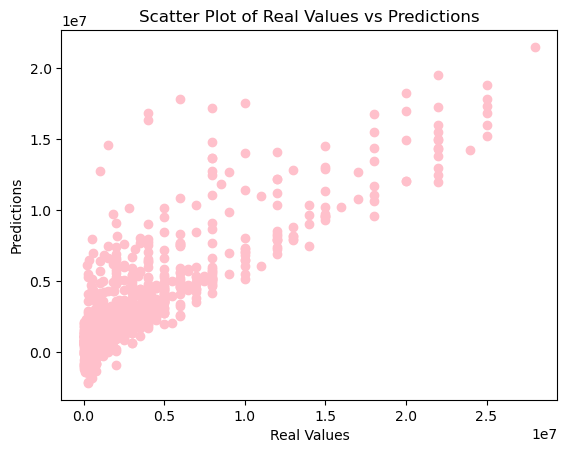

In [382]:
#Real_Values
plt.scatter(Real_Values, predictions, color='pink')
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Real Values vs Predictions")
plt.show()

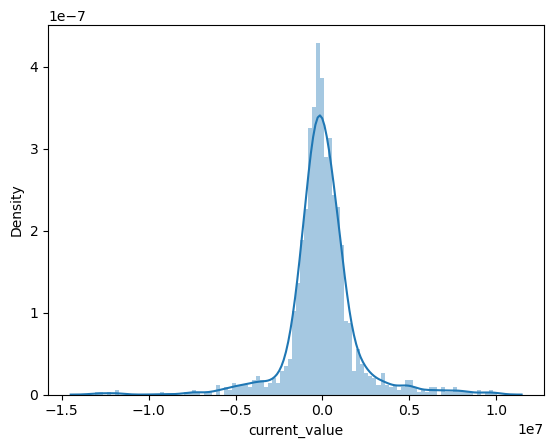

In [383]:
sns.distplot((y_test-predictions),bins=100); # it's good if we get normal distribution